# **Análise dos Dados da Violência no Rio de Janeiro**

O **Rio de Janeiro** é conhecido mundialmente por suas belezas naturais e pelos encantadores movimentos culturais. No entanto, um dado notável sobre o estado do Rio de Janeiro é seu grande volume populacional, sendo o terceiro estado mais populoso, com **16.054.524 habitantes** em 2022, segundo o [IBGE](http://www.ispvisualizacao.rj.gov.br/index.html).

Além das suas características atrativas, é importante ressaltar que o **Rio de Janeiro** também enfrenta desafios relacionados à **segurança pública**. A **violência** é uma preocupação constante na região, afetando a qualidade de vida de seus habitantes.

Uma das boas iniciativas da Governo do Rio de Janeiro é disponibilizar dados sobre a violência pública. Por meio do portal [Instituto de Segurança Pública](http://www.ispdados.rj.gov.br/), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://upload.wikimedia.org/wikipedia/commons/7/74/Logo_governo_rj_2019.png"></center>

**Siga comigo neste notebook, onde iremos destacar análises interessantes sobre os dados públicos relacionados à violência no Rio de Janeiro. Aqui buscaremos compreender os padrões, tendências e fatores que contribuem para essa problemática.**

## **Obtenção dos Dados**


Todos os dados utilizados aqui foram obtidos a partir do site do [Instituto de Segurança Pública](http://www.ispdados.rj.gov.br/).

* O arquivo ``csv`` foi processado previamente para ser utilizado ao longo desta análise.
  * [Clique aqui](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv) para ter acesso.

###  **Importando os dados**


In [ ]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importando o arquivo violencia_rio.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## ▶️ **Análise Inicial dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

* Extrair e imprimir os nomes das colunas (`columns`)
* Quais os tipos das variáveis (`dtypes`)
* Visualizar as 5 primeiras linhas (`head`)
* Identifique a porcentagem de valores ausentes das colunas


### **Tamanho do DataFrame**

In [ ]:
# exibir quantidade de colunas e linhas totais do df
df.shape[0]

344

### **Extração de colunas**

In [ ]:
# extrair e imprimir os nomes das colunas
df.columns.values

array(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa',
       'estupro', 'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos',
       'total_roubos', 'furto_veiculos', 'furto_transeunte',
       'furto_coletivo', 'furto_celular', 'furto_bicicleta',
       'outros_furtos', 'total_furtos', 'sequestro', 'extorsao',
       'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
    

### **Tipos de variáveis**

In [ ]:
# imprimir tipos de variáveis de todas colunas do df
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### ***Dataset***

In [ ]:
# visualizar as 5 primeiras linhas do df
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### **Valores ausentes (%)**

In [ ]:
# identificar a porcentagem de valores ausentes das colunas
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

furto_bicicleta               0.802326
roubo_bicicleta               0.802326
cmba                          0.523256
posse_drogas                  0.523256
trafico_drogas                0.523256
apreensao_drogas_sem_autor    0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
furto_celular                 0.418605
sequestro_relampago           0.418605
extorsao                      0.418605
furto_coletivo                0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estelionato                   0.418605
pol_militares_mortos_serv     0.418605
pol_civis_mortos_serv         0.418605
estupro                       0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
registro_ocorrencias          0.279070
lesao_corp_morte              0.279070
sequestro                

## **Informações Estatísticas da Violência no Rio de Janeiro**

A violência no Rio de Janeiro é um desafio presente, com índices expressivos de roubo e furto de veículos. No entanto, um aspecto encorajador é a taxa de recuperação de carros, que oferece uma interessante análise em relação aos veículos roubados e furtados.

Descreva e execute as seguintes etapas:

* Imprima o resumo estatístico do seu DataFrame (`describe`)
* Encontre as médias das seguintes variáveis (colunas):
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
* Calcule qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$
* Encontre os valores máximos (`max`) e mínimos (`min`) da coluna `hom_doloso`


### **Resumo estatístico do DataFrame**

In [ ]:
# imprime o resumo estatístico das variáveis numéricas
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,...,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,...,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,...,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,...,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,...,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,...,427.000000,60.500000,3.000000,2.000000,0.00000,590.000000,4190.000000,2322.000000,54926.500000,3.000000
75%,2012.000000,9.000000,577.250000,6.000000,19.000000,96.25000,398.250000,6582.500000,441.250000,236.250000,...,481.500000,87.000000,4.000000,3.000000,1.00000,649.000000,6872.750000,2778.000000,63292.500000,3.000000
max,2019.000000,12.000000,831.000000,21.000000,36.000000,194.00000,645.000000,9050.000000,561.000000,449.000000,...,628.000000,217.000000,13.000000,10.000000,3.00000,848.000000,13833.000000,5358.000000,75403.000000,3.000000


### **Médias**

Médias geradas das seguintes varáveis:
* `roubo_veiculo`
* `furto_veiculos`
* `recuperacao_veiculos`

### **Porcentagem de carros recuperados em relação aos carros roubados + carros furtados**

* $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

In [ ]:
# ver a porcentagem de carros recuperados em relação aos carros roubados + carros furtados
(df['recuperacao_veiculos'].sum() / (df['roubo_veiculo'].sum() + df['furto_veiculos'].sum())) * 100

# outra forma simplificada de encontrar a relação seria a partir da fórmula --> mean_recuperacao_veiculos / (mean_furto_veiculos + mean_roubo_veiculo)

42.980346705075085

## **Visualização de Dados**

Podemos plotar alguns dados para uma melhor visualização de outras variáveis, como `hom_doloso` e `roubo_em_coletivo`.

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


### **Histograma**

* `hom_doloso`

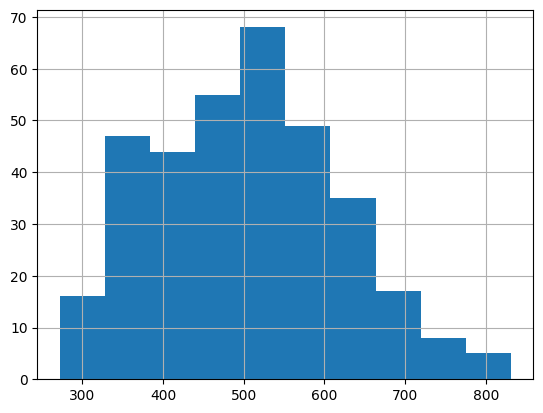

In [ ]:
# plotar histograma de hom_doloso
df.hom_doloso.hist();

### **Gráfico de linhas**

* `roubo_em_coletivo`

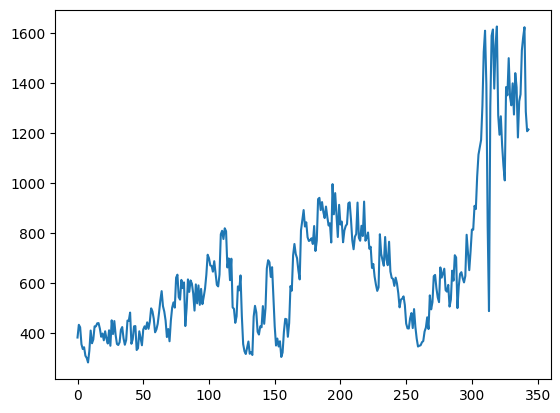

In [ ]:
# plotar gráfico de linhas para roubo_em_coletivo
df.roubo_em_coletivo.plot();

## **Conclusão**

Com base na análise dos dados de violência no Rio de Janeiro disponibilizados pelo Instituto de Segurança Pública, algumas conclusões podem ser tiradas:

### **Tendências temporais**

Ao analisar as variações ao longo de vinte anos, foi observado um padrão sazonal na ocorrência de crimes, com maiores índices durante os meses de Janeiro e Março. Isso sugere a influência de fatores sazonais ou eventos específicos, no aumento da violência, como o período de férias em Janeiro e o Carnaval em Março.

### **Localização geográfica**

A análise geoespacial, baseada na [Divisão Territorial do ISP](https://www.ispdados.rj.gov.br/divisaoTerritorial.html) revelou áreas específicas do Rio de Janeiro com maior incidência de Registros de Ocorrências, durante o ano corrente de 2023.
* Decrescentemente, essas áreas são:

| Área | Registros de Ocorrências (Janeiro a Maio - 2023) |
|------|-------------------------|
| 1ª RISP Capital (Zona Sul, Centro e parte da Norte) | <center>88.845|
| 2ª RISP Capital (Zona Oeste e parte da Norte) | <center>81.996 |
| 3ª RISP Baixada Fluminense | <center>58.605 |
| 4ª RISP Grande Niterói e Região dos Lagos | <center>47.345 |
| 6ª RISP Norte Fluminense e Noroeste | <center>25.074 |
| 5ª RISP Sul Fluminense | <center>22.011 |
| 7ª RISP Região Serrana | <center>16.921 |

Essas conclusões são baseadas em uma análise geral dos dados. Para insights e conclusões mais completas e precisas, teríamos que obter acesso à um banco de dados mais complexo, podendo então considerar outras variáveis relevantes e aplicar técnicas estatísticas mais avançadas.